<a href="https://colab.research.google.com/github/NID123-CH/DSR-40/blob/main/DSR_40_ARIMA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt


from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict


from datetime import datetime

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers.csv


{'AirPassengers.csv': b'Month,#Passengers\n1949-01,112\n1949-02,118\n1949-03,132\n1949-04,129\n1949-05,121\n1949-06,135\n1949-07,148\n1949-08,148\n1949-09,136\n1949-10,119\n1949-11,104\n1949-12,118\n1950-01,115\n1950-02,126\n1950-03,141\n1950-04,135\n1950-05,125\n1950-06,149\n1950-07,170\n1950-08,170\n1950-09,158\n1950-10,133\n1950-11,114\n1950-12,140\n1951-01,145\n1951-02,150\n1951-03,178\n1951-04,163\n1951-05,172\n1951-06,178\n1951-07,199\n1951-08,199\n1951-09,184\n1951-10,162\n1951-11,146\n1951-12,166\n1952-01,171\n1952-02,180\n1952-03,193\n1952-04,181\n1952-05,183\n1952-06,218\n1952-07,230\n1952-08,242\n1952-09,209\n1952-10,191\n1952-11,172\n1952-12,194\n1953-01,196\n1953-02,196\n1953-03,236\n1953-04,235\n1953-05,229\n1953-06,243\n1953-07,264\n1953-08,272\n1953-09,237\n1953-10,211\n1953-11,180\n1953-12,201\n1954-01,204\n1954-02,188\n1954-03,235\n1954-04,227\n1954-05,234\n1954-06,264\n1954-07,302\n1954-08,293\n1954-09,259\n1954-10,229\n1954-11,203\n1954-12,229\n1955-01,242\n1955-02,

In [ ]:
# prompt: read text file with pndas

import pandas as pd
data = pd.read_csv('AirPassengers.csv') # Adjust sep if needed



     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [ ]:
data.info()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


<Axes: >

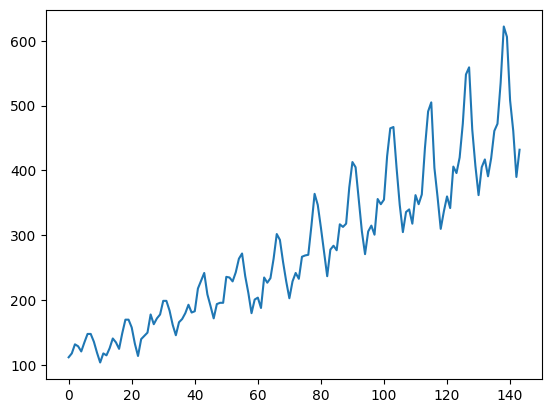

In [ ]:
data['#Passengers'].plot()

**Understanding ARIMA Parameters¶**

The key points to understand here are p, d, and q. Let's delve into their meanings: 👓

p: Autoregressive Order. This is the number of past observations considered for making future predictions. ⌛

q: Moving Average Order. It accounts for a specific number of previous residuals when making future predictions. 📊

d: Integration Order. It determines the number of differences needed to make the time series stationary (T(q) - T(q-1)).

**Finding d¶**

ARIMA models work with stationary data, where the mean and standard deviation remain relatively constant over time.

We will use Augmented Dickey-Fuller (ADF) test, a common statistical test used to determine whether a given time series is stationary or not

If data fail the test (p > .05), then we will perform difference operation on data.

We will keep on doing differencing till our data pass ADF.

Number of time we perform the differencing, will be the value of Integration Order (d)

In [ ]:
d = 0
p_value = adfuller(data['#Passengers'])[1]
diff_data = data['#Passengers']

while p_value > 0.05:
    diff_data = diff_data.diff()
    p_value = adfuller(diff_data.dropna())[1]
    d += 1


print(f'P Value: {p_value}\t Number of differencing needed: {d}')

P Value: 2.7328918500142026e-29	 Number of differencing needed: 2


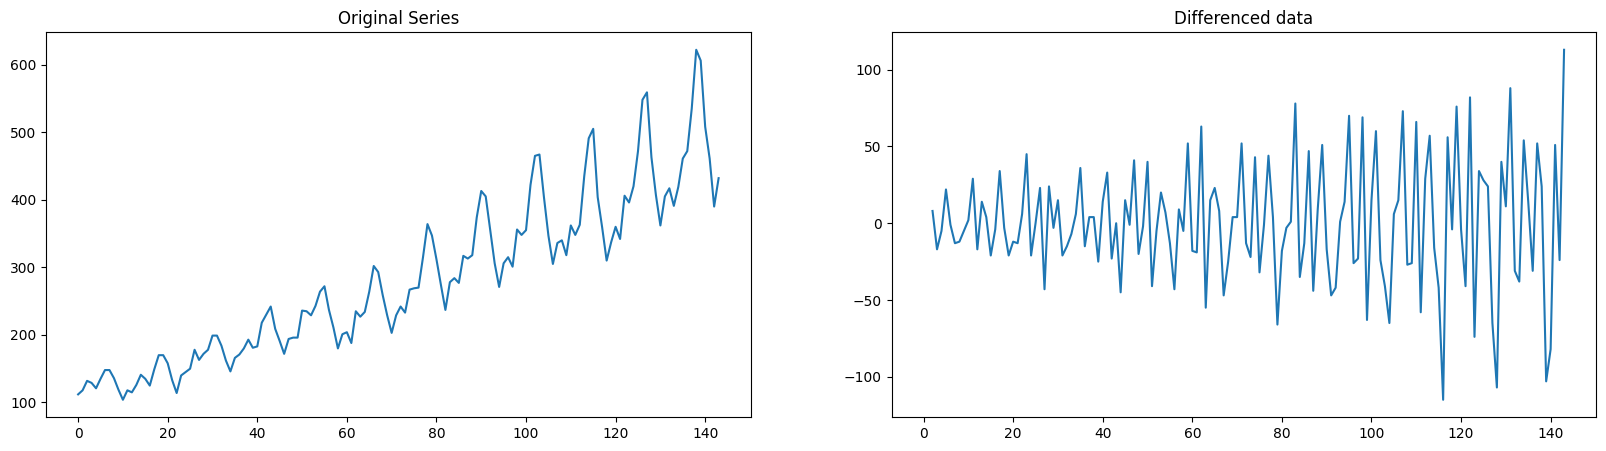

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
axes[0].plot(data['#Passengers']); axes[0].set_title('Original Series')
axes[1].plot(diff_data); axes[1].set_title('Differenced data')
plt.show()

We can see that data look stationary now, as values are euqally distributed around zero. So we can proceed ahead.

d = 2

**Finding p¶**

We will use Partial Autocorrelation (PACF) plot.

Partial Autocorrelation, is the correlation between current value and a particular value in past, ignoring all values in between.

We can use PACF graph to find the last significat lag that is above the threshold area.

Number of lags between that last and first lag is the, value of AR (p).

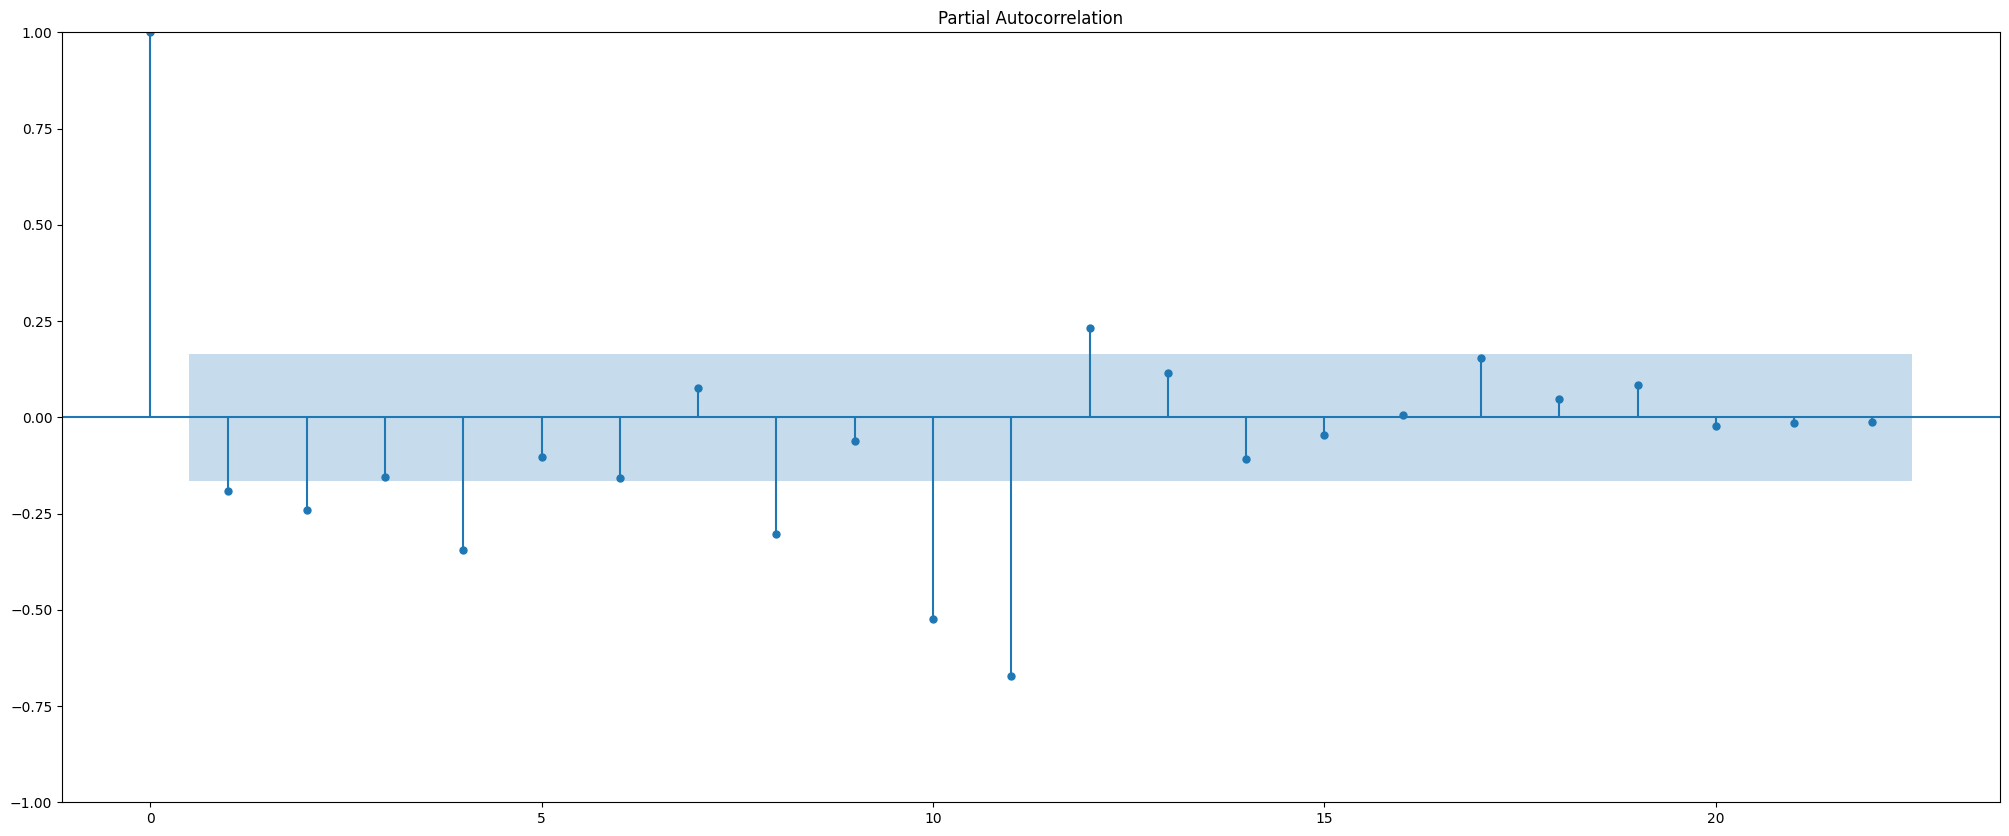

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
plot_pacf(diff_data.dropna(), ax=ax)
plt.show()

Last significat lag is 11, so value of p = 11

**Finding q**

We will use Autocorrelation (PACF) plot.

Autocorrelation, is tells the number MA that should be removed so that there is no autocorrelation in the stationarized series.

Number of lags outside the threshold area is the, value of MR (q).

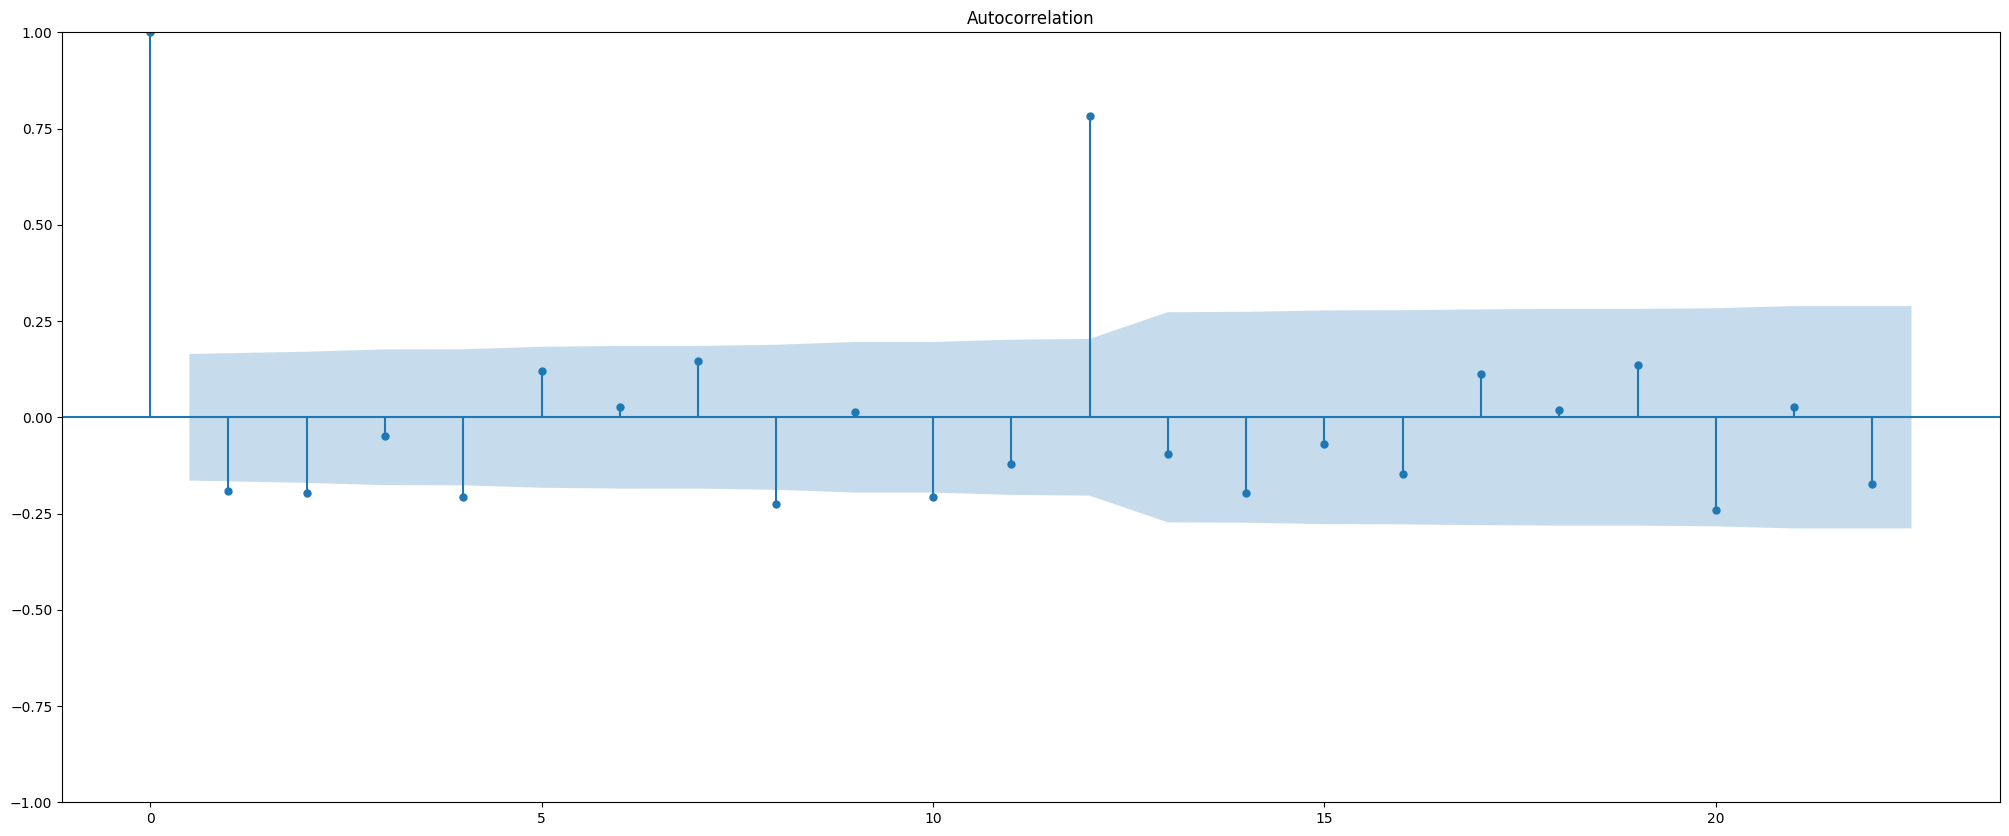

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
plot_acf(diff_data.dropna(), ax=ax)
plt.show()

There is only one outside the area significantly, so value of q = 1

**Model**

In [ ]:
model = ARIMA(data['#Passengers'].values, order=(11,2,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  144
Model:                ARIMA(11, 2, 1)   Log Likelihood                -557.649
Date:                Mon, 30 Sep 2024   AIC                           1141.297
Time:                        09:42:45   BIC                           1179.723
Sample:                             0   HQIC                          1156.912
                                - 144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8713      0.069    -12.641      0.000      -1.006      -0.736
ar.L2         -0.9382      0.044    -21.302      0.000      -1.025      -0.852
ar.L3         -0.9004      0.070    -12.876      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


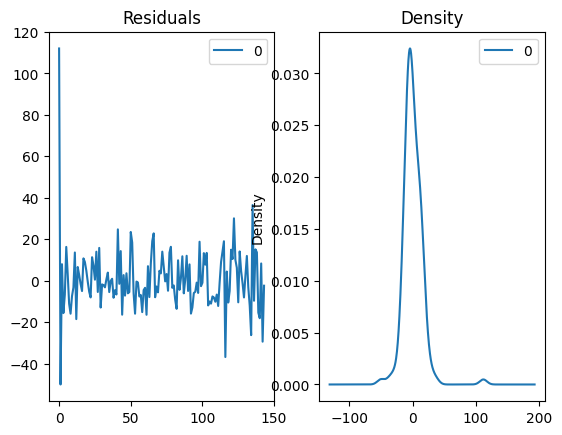

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Residual graph is very favourable, as it is distrubited near zero. Concluding that the mean and variance is constant.

**Forecast**

0
143


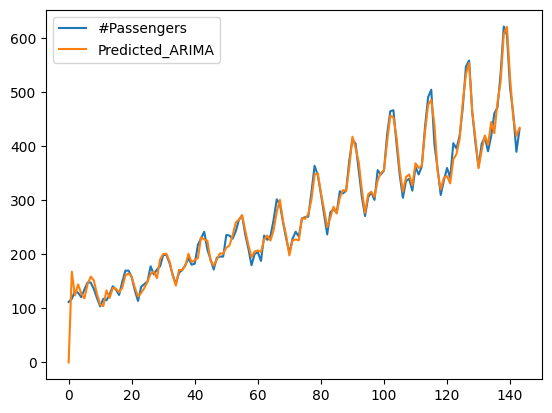

<Figure size 1000x600 with 0 Axes>

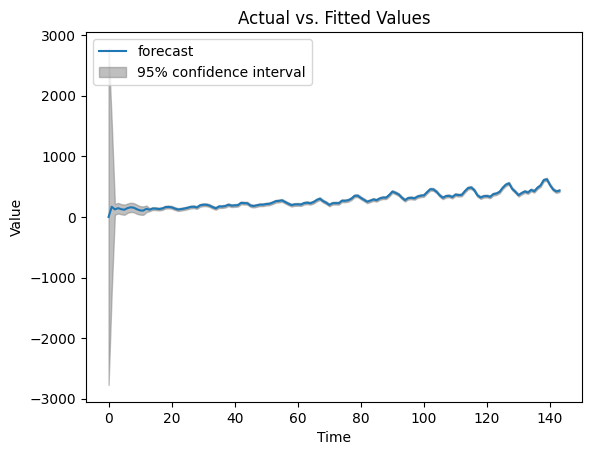

In [ ]:
##prediction
pred_start_date=data['Month'].index[0]
pred_end_date=data['Month'].index[-1]
print(pred_start_date)
print(pred_end_date)

pred=model_fit.predict(start=pred_start_date,end=pred_end_date)
data['Predicted_ARIMA']=pred

data[['#Passengers','Predicted_ARIMA']].plot()

# Plot actual vs. fitted values
plt.figure(figsize=(10, 6))
plot_predict(model_fit, dynamic=False)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Fitted Values')
plt.legend(loc='upper left')
plt.show()

Most values are inside confidence interval, so we are good to forecast the data now

<Axes: >

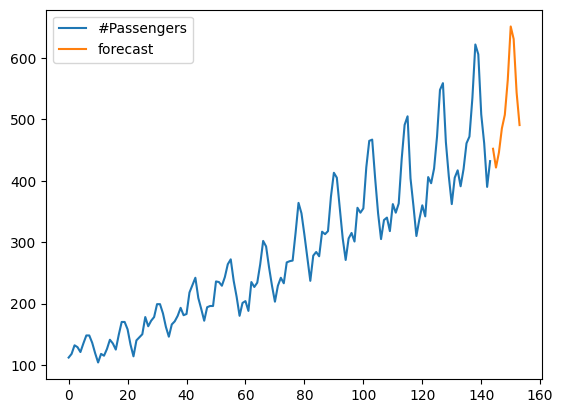

In [ ]:
# Define the number of steps to forecast
forecast_steps = 10

# Forecast future values
forecast = model_fit.forecast(steps=forecast_steps)

# Create a range of future dates
date_range = pd.date_range(start=data['Month'].iloc[-1], periods=forecast_steps + 1, freq='MS')[1:]

# Create a DataFrame for the forecasted values
forecast_df = pd.DataFrame({'Month': date_range, 'forecast': forecast})

# Merge the forecasted values with the original data
data = pd.concat([data, forecast_df], ignore_index=True)

data[['#Passengers','forecast']].plot()

**NEW DAT**A

In [3]:
!pip install pmdarima
import pandas as pd
import numpy as np
%matplotlib inline
# load specific forecasting tools
#from statsmodels.tsa.arima_model import ARMA ,ARMAResults ,ARIMA ,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf  #(for determining (p,q) orders)
from pmdarima import auto_arima # for determining ARIMA orders

# ignore harmless warning
import warnings
warnings.filterwarnings("ignore")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.2 MB/s eta 0:00:00


In [1]:
from google.colab import files
files.upload()

Saving AirPassengers.csv to AirPassengers.csv


{'AirPassengers.csv': b'Month,#Passengers\n1949-01,112\n1949-02,118\n1949-03,132\n1949-04,129\n1949-05,121\n1949-06,135\n1949-07,148\n1949-08,148\n1949-09,136\n1949-10,119\n1949-11,104\n1949-12,118\n1950-01,115\n1950-02,126\n1950-03,141\n1950-04,135\n1950-05,125\n1950-06,149\n1950-07,170\n1950-08,170\n1950-09,158\n1950-10,133\n1950-11,114\n1950-12,140\n1951-01,145\n1951-02,150\n1951-03,178\n1951-04,163\n1951-05,172\n1951-06,178\n1951-07,199\n1951-08,199\n1951-09,184\n1951-10,162\n1951-11,146\n1951-12,166\n1952-01,171\n1952-02,180\n1952-03,193\n1952-04,181\n1952-05,183\n1952-06,218\n1952-07,230\n1952-08,242\n1952-09,209\n1952-10,191\n1952-11,172\n1952-12,194\n1953-01,196\n1953-02,196\n1953-03,236\n1953-04,235\n1953-05,229\n1953-06,243\n1953-07,264\n1953-08,272\n1953-09,237\n1953-10,211\n1953-11,180\n1953-12,201\n1954-01,204\n1954-02,188\n1954-03,235\n1954-04,227\n1954-05,234\n1954-06,264\n1954-07,302\n1954-08,293\n1954-09,259\n1954-10,229\n1954-11,203\n1954-12,229\n1955-01,242\n1955-02,

In [4]:
#load the dataset
airline = pd.read_csv('AirPassengers.csv' , index_col=0,parse_dates=True)
airline.index.freq='MS'

In [5]:
airline.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
airline.shape

(144, 1)

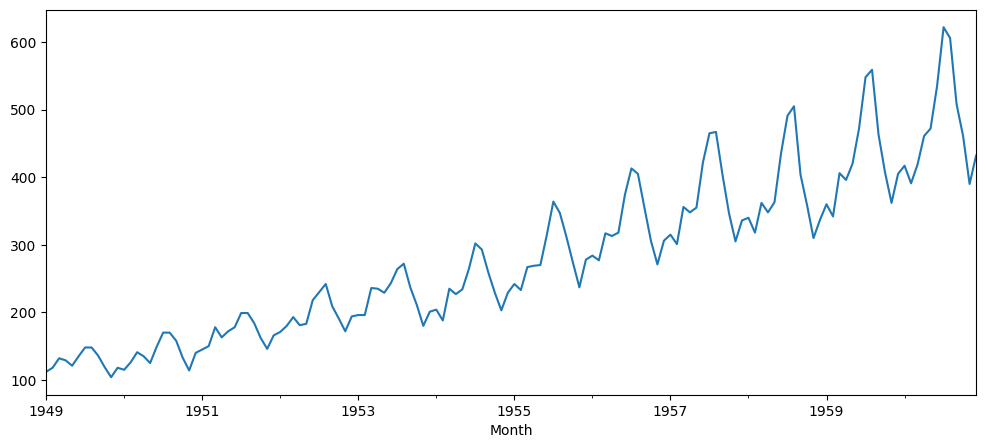

In [7]:
airline['#Passengers'].plot(figsize=(12,5)).autoscale(axis='x',tight =True)

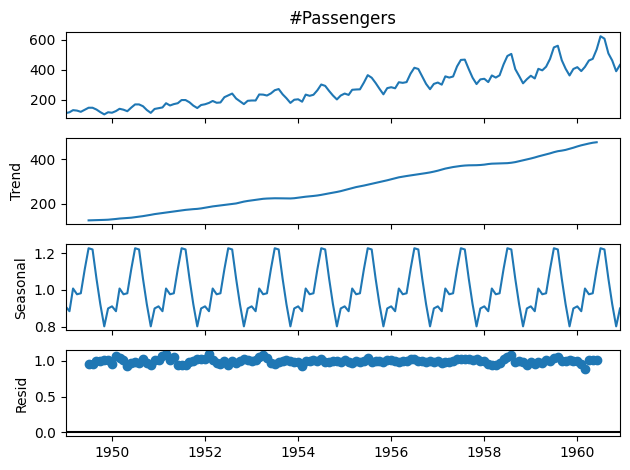

In [8]:
# to visualize the component of time series
from statsmodels.tsa.seasonal import seasonal_decompose
results =  seasonal_decompose(airline['#Passengers'] , model="multiplicative")
results.plot();

In [9]:
# we will use the pmdarima  to know the parameters first

stepwise_fit = auto_arima(airline['#Passengers'],start_p =1 ,start_q=1,max_p =3 ,max_q=3,m=12,
                         start_P =0 ,seasonal=True ,
                          d =None ,D =1 , trace = True ,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwie=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.43 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.32 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.40 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.24 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=0.46 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.97 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.50 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.30 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=3.06 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Tue, 01 Oct 2024   AIC                           1019.178
Time:                                     13:41:11   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**[1] Covariance matrix calculated using the outer product of gradients (complex-step).**

In [10]:
from statsmodels.tsa.statespace.tools import diff
airline['d1'] =diff(airline['#Passengers'],k_diff=1)

In [11]:
from statsmodels.tsa.stattools import adfuller
print('Augmented Dickey Fuller Test on AirLine data')
dftest = adfuller(airline['d1'].dropna(),autolag='AIC')
dftest

Augmented Dickey Fuller Test on AirLine data


(-2.8292668241700047,
 0.05421329028382478,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854085)

In [12]:
print('Augented Dicley Fuller on Airline data')
dfout = pd.Series(dftest[0:4],index =['ADF test staistic','p-value','# lag used' ,'# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value{{key}}']=val
print(dfout)

Augented Dicley Fuller on Airline data
ADF test staistic       -2.829267
p-value                  0.054213
# lag used              12.000000
# observations         130.000000
critical value{key}     -2.578770
dtype: float64


# now airline data is stationary
# now find the ACF and PACF for the data

In [13]:
from statsmodels.tsa.stattools import acf , pacf
acf(airline['#Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [14]:
pacf(airline['#Passengers'])

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805,  0.2411297 , -0.15800498, -0.7183246 , -0.08948064,
        0.22160591,  0.13462253,  0.11561572,  0.1948294 ,  0.09665618,
       -0.20215868, -0.0936381 ])

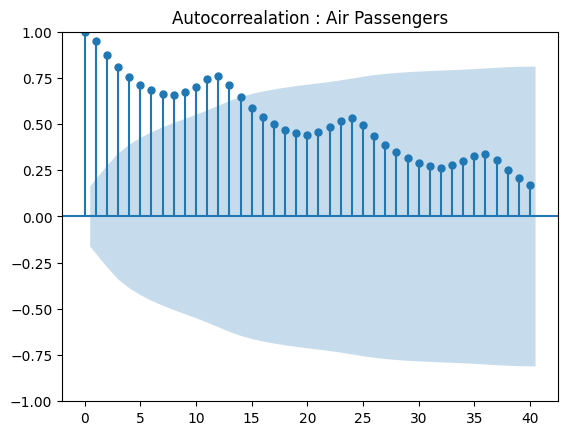

In [15]:
title = "Autocorrealation : Air Passengers"
lag =40
plot_acf(airline['#Passengers'],title=title ,lags=lag);

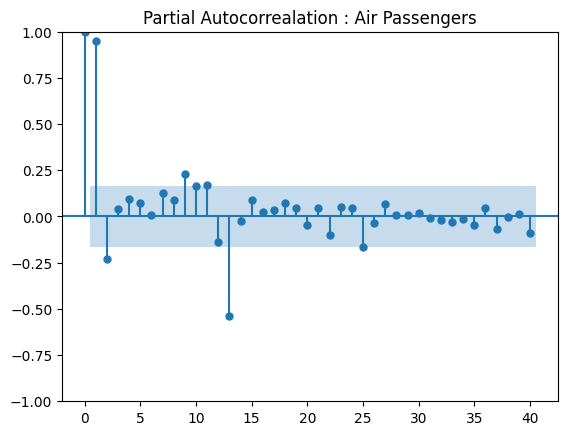

In [16]:
title = "Partial Autocorrealation : Air Passengers"
lag =40
plot_pacf(airline['#Passengers'],title=title ,lags=lag);

In [17]:
# dividing the dataset to traing and testing
train = airline.iloc[:132]  # first 132 row for training
test = airline.iloc[132:]

In [18]:
from statsmodels.tsa.arima.model import ARIMA  # Corrected import

# Fit the ARIMA model
model = ARIMA(train['#Passengers'], order=(1, 1, 0))  # Define the ARIMA order
results = model.fit()  # Fit the model

# Print the summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -631.365
Date:                Tue, 01 Oct 2024   AIC                           1266.731
Time:                        13:46:39   BIC                           1272.481
Sample:                    01-01-1949   HQIC                          1269.068
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2912      0.090      3.236      0.001       0.115       0.468
sigma2       898.3992     91.552      9.813      0.000     718.961    1077.838
Ljung-Box (L1) (Q):                   0.51   Jarque-

In [19]:
# predict values
start =len(train)
end=len(train)+len(test)-1
predictions =  results.predict(start=start , end=end ,dynamic =False ,typ='levels').rename('ARIMA(0,1,1) Predictions')

In [20]:
# compare predictions to expected values
for i  in range(len(predictions)):
    print(f"predicted={predictions[i]},expected={test['#Passengers'][i]}")

predicted=417.5224211280131,expected=417
predicted=421.16918928864817,expected=391
predicted=422.231197815711,expected=419
predicted=422.5404749789069,expected=461
predicted=422.63054239478635,expected=472
predicted=422.6567717462178,expected=535
predicted=422.6644102342304,expected=622
predicted=422.66663470780423,expected=606
predicted=422.6672825169875,expected=508
predicted=422.6674711713922,expected=461
predicted=422.66752611115743,expected=390
predicted=422.6675421106662,expected=432


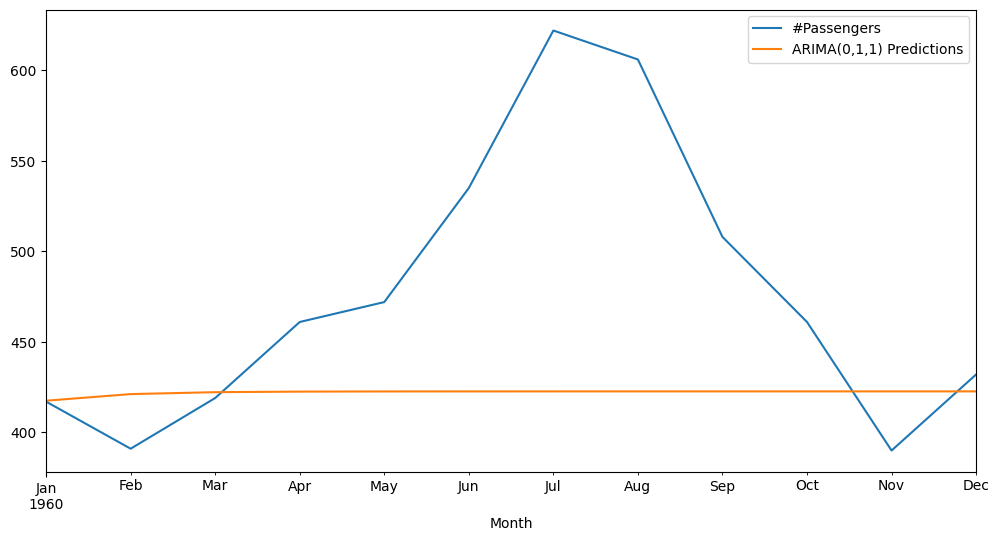

In [21]:
# plot prediction against known values

ax = test['#Passengers'].plot(legend=True ,figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [22]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['#Passengers'],predictions)
print(f'ARIMA(0,1,1) MSE error{error:11.10}')

ARIMA(0,1,1) MSE error8392.457545


In [23]:
from statsmodels.tools.eval_measures import rmse  # Corrected import

# Assuming 'predictions' and 'test' data are already defined
error = rmse(test['#Passengers'], predictions)

# Print the RMSE error
print(f'ARIMA(1,1,1) RMSE error: {error:.10f}')  # Corrected print formatting

ARIMA(1,1,1) RMSE error: 91.6103571917


**Retrain the model on the full data and forecast**

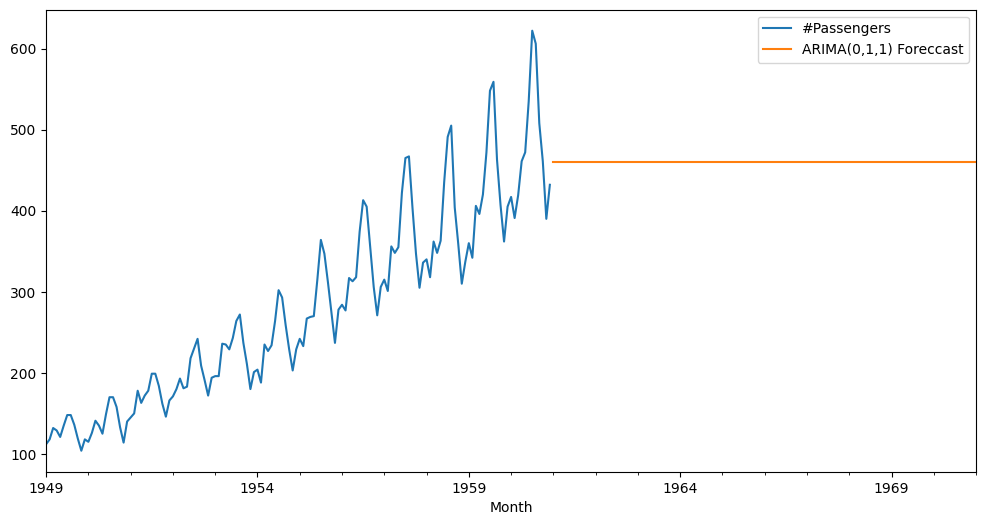

In [25]:
# plot predictions against known values
model = ARIMA(airline['#Passengers'],order=(0,1,1))
results =model.fit()
fcast = results.predict(len(airline),len(airline)+12*10,typ='levels').rename('ARIMA(0,1,1) Foreccast')

ax = airline['#Passengers'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [27]:
model = SARIMAX(train['#Passengers'],order=(0,1,1) , seasonal_order=(2,1,0,12) ,enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -446.830
Date:                             Tue, 01 Oct 2024   AIC                            901.659
Time:                                     13:51:48   BIC                            912.776
Sample:                                 01-01-1949   HQIC                           906.173
                                      - 12-01-1959                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2556      0.080     -3.190      0.001      -0.413      -0.099
ar.S.L12      -0.0962      0.090     -1.073      0.283      -0.272       0.080
ar.S.L24       0.1454      0.101      1.445      0.149      -0.052       0.343
sigma2       106.2405     15.243      6.970      0.000      76.364     136.117
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.86   Prob(JB):                         0.99
Heteroskedasticity (H):               1.63   Skew:                             0.01
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**[1] Covariance matrix calculated using the outer product of gradients (complex-step).**

In [28]:
# predict values
start =len(train)
end=len(train)+len(test)-1
predictions =  results.predict(start=start , end=end ,dynamic =False ,typ='levels').rename('SARIMAX(0,1,1) Predictions')

In [29]:
# compare predictions to expected values
for i  in range(len(predictions)):
    print(f"predicted={predictions[i]},expected={test['#Passengers'][i]}")

predicted=421.1533733837371,expected=417
predicted=401.60574817600195,expected=391
predicted=462.0835652296267,expected=419
predicted=450.8266947179123,expected=461
predicted=475.1243490487775,expected=472
predicted=529.7742679070907,expected=535
predicted=605.7411413129639,expected=622
predicted=618.7741243068274,expected=606
predicted=516.7690270528685,expected=508
predicted=463.5712228940365,expected=461
predicted=417.16897503431176,expected=390
predicted=458.04903994766124,expected=432


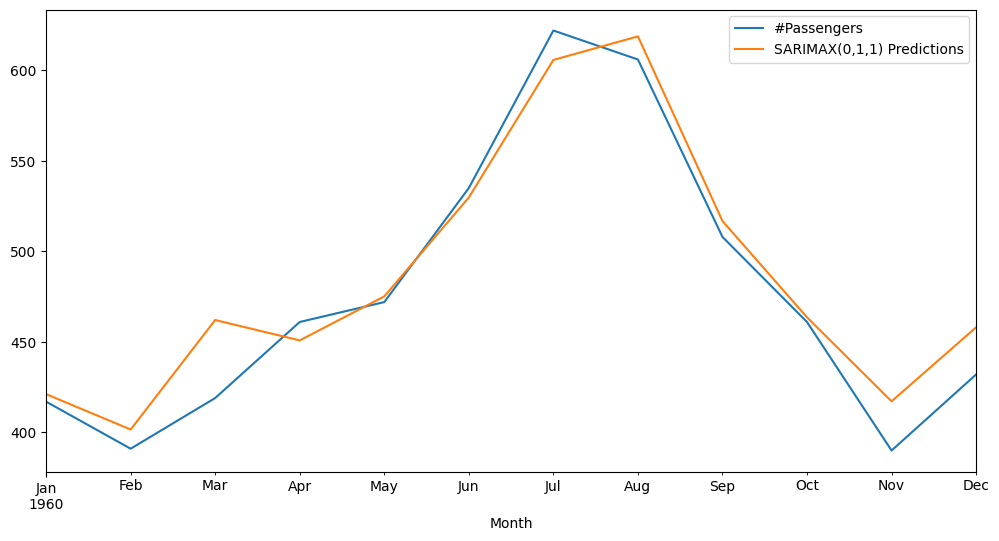

In [30]:
# plot prediction against known values

ax = test['#Passengers'].plot(legend=True ,figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)

In [31]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['#Passengers'],predictions)
print(f'SARIMAX(0,1,1) MSE error{error:11.10}')

SARIMAX(0,1,1) MSE error337.8527848


In [32]:
from statsmodels.tools.eval_measures import rmse  # Corrected import

# Assuming 'predictions' and 'test' data are already defined
error = rmse(test['#Passengers'], predictions)

# Print the RMSE error
print(f'SARIMAX(1,1,1) RMSE error: {error:.10f}')  # Corrected print formatting

SARIMAX(1,1,1) RMSE error: 18.3807721497


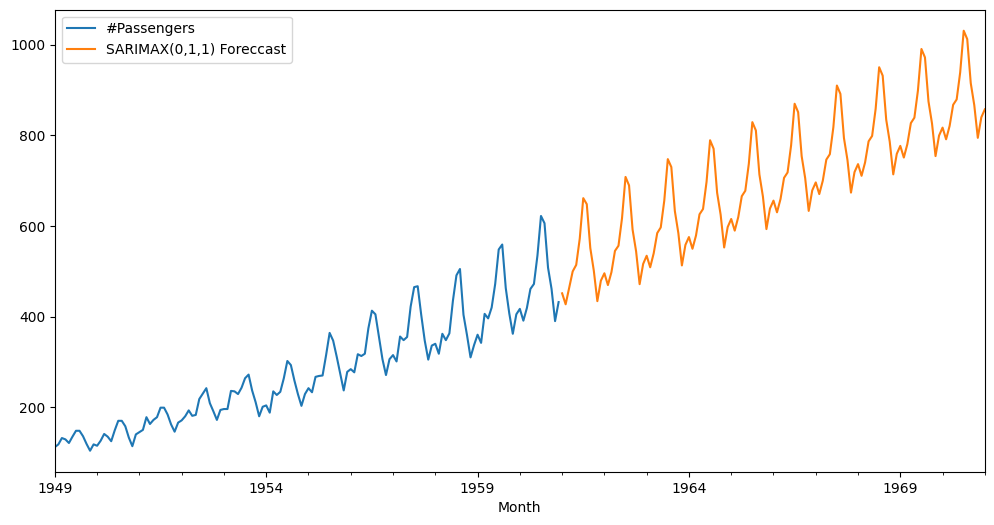

In [33]:
# plot predictions against known values
model = SARIMAX(airline['#Passengers'],order=(0,1,1),seasonal_order=(2,1,0,12),enforce_invertibility =False)
results =model.fit()
fcast = results.predict(len(airline),len(airline)+12*10,typ='levels').rename('SARIMAX(0,1,1) Foreccast')

ax = airline['#Passengers'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)